In [2]:
#import the libraries

import pandas as pd
import numpy as np

In [3]:
#load dataset
data = pd.read_csv("plant_growth_data.csv")

In [4]:
#head the data
data.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [5]:
#there is not null data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [6]:
#convert to categoric values to numeric 

# replacing values - Soil Type
data['Soil_Type'].replace(['loam','sandy','clay'],
                        [0,1,2], inplace=True)
data.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,0,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,1,4.033133,weekly,organic,28.919484,52.422276,1
2,0,8.892769,bi-weekly,none,23.179059,44.660539,0
3,0,8.241144,bi-weekly,none,18.465886,46.433227,0
4,1,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [7]:
#convert to categoric values to numeric 

# replacing values - Water_Frequency
data['Water_Frequency'].replace(['bi-weekly','weekly','daily'],
                        [0,1,2], inplace=True)
data.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,0,5.192294,0,chemical,31.719602,61.591861,0
1,1,4.033133,1,organic,28.919484,52.422276,1
2,0,8.892769,0,none,23.179059,44.660539,0
3,0,8.241144,0,none,18.465886,46.433227,0
4,1,8.374043,0,organic,18.128741,63.625923,0


In [8]:
#convert to categoric values to numeric 

# replacing values - Fertilizer_Type
data['Fertilizer_Type'].replace(['chemical','organic','none'],
                        [0,1,2], inplace=True)
data.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,0,5.192294,0,0,31.719602,61.591861,0
1,1,4.033133,1,1,28.919484,52.422276,1
2,0,8.892769,0,2,23.179059,44.660539,0
3,0,8.241144,0,2,18.465886,46.433227,0
4,1,8.374043,0,1,18.128741,63.625923,0


In [9]:
#detect outliers
from scipy import stats

# Calculate the z-scores
z_scores = stats.zscore(data)

# Print the z-scores
z_scores

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,-1.255480,-1.024340,-1.292085,-1.235156,1.244039,0.277238,-0.994832
1,-0.031704,-1.750923,-0.087387,-0.055032,0.719700,-0.450562,1.005195
2,-1.255480,1.295184,-1.292085,1.125093,-0.355230,-1.066621,-0.994832
3,-1.255480,0.886734,-1.292085,1.125093,-1.237800,-0.925920,-0.994832
4,-0.031704,0.970038,-1.292085,-0.055032,-1.300933,0.438684,-0.994832
...,...,...,...,...,...,...,...
188,-0.031704,-0.736188,1.117311,1.125093,0.547521,0.960476,-0.994832
189,1.192072,0.439723,-0.087387,-1.235156,1.015661,0.158828,1.005195
190,-1.255480,-1.186243,-1.292085,1.125093,-0.107876,0.285821,-0.994832
191,-0.031704,0.906702,1.117311,-0.055032,0.528795,0.904917,1.005195


In [10]:
# Convert the z-scores to absolute values
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
filtered_df = data[filtered_entries]

In [11]:
filtered_df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,0,5.192294,0,0,31.719602,61.591861,0
1,1,4.033133,1,1,28.919484,52.422276,1
2,0,8.892769,0,2,23.179059,44.660539,0
3,0,8.241144,0,2,18.465886,46.433227,0
4,1,8.374043,0,1,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,1,5.652000,2,2,28.000000,70.200000,0
189,2,7.528000,1,0,30.500000,60.100000,1
190,0,4.934000,0,2,24.500000,61.700000,0
191,1,8.273000,2,1,27.900000,69.500000,1


In [12]:
#basic statistic values

data.describe()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,1.025907,6.826484,1.072539,1.046632,25.076087,58.098927,0.497409
std,0.819268,1.599509,0.832242,0.849572,5.354170,12.631799,0.501294
min,0.000000,4.033133,0.000000,0.000000,15.200000,30.567682,0.000000
25%,0.000000,5.477000,0.000000,0.000000,20.637095,49.300000,0.000000
50%,1.000000,6.833290,1.000000,1.000000,25.912336,59.182806,0.000000
75%,2.000000,8.241144,2.000000,2.000000,29.757938,69.100000,1.000000
max,2.000000,9.913903,2.000000,2.000000,34.810103,79.648240,1.000000


In [15]:
#data visualization

#import libraries
import seaborn as sns

import matplotlib.pyplot as plt

<Axes: xlabel='Sunlight_Hours', ylabel='Humidity'>

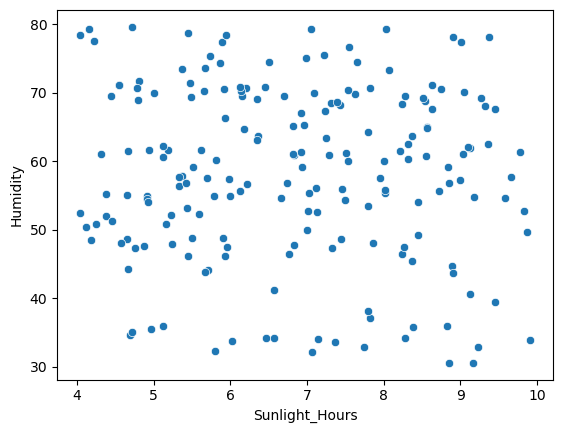

In [16]:
#Sunlight_Hours and Humidity

sns.scatterplot(x="Sunlight_Hours",y="Humidity",data=data)

<Axes: xlabel='Soil_Type', ylabel='count'>

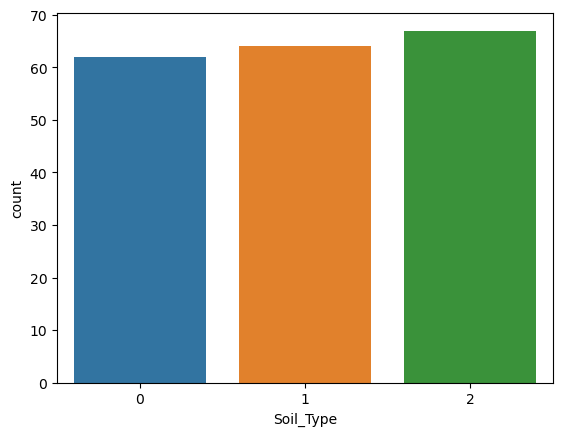

In [18]:
# countplot - Soil Type

sns.countplot(x='Soil_Type', data=data)


<Axes: xlabel='Water_Frequency', ylabel='count'>

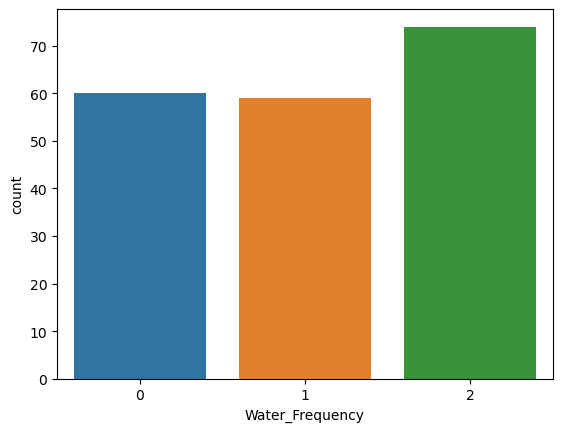

In [19]:
# countplot - Water_Frequency

sns.countplot(x='Water_Frequency', data=data)

<Axes: xlabel='Fertilizer_Type', ylabel='count'>

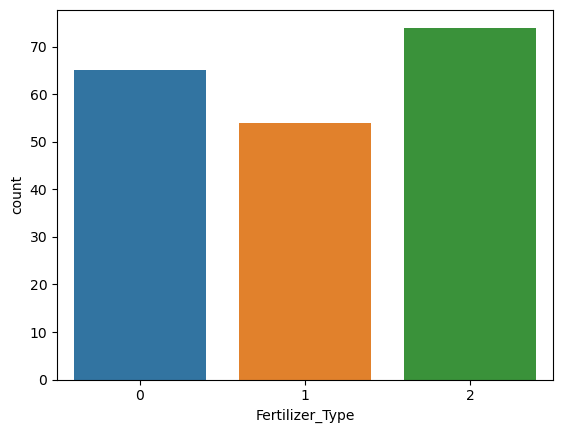

In [20]:
# countplot - Fertilizer_Type

sns.countplot(x='Fertilizer_Type', data=data)

<Axes: xlabel='Growth_Milestone', ylabel='count'>

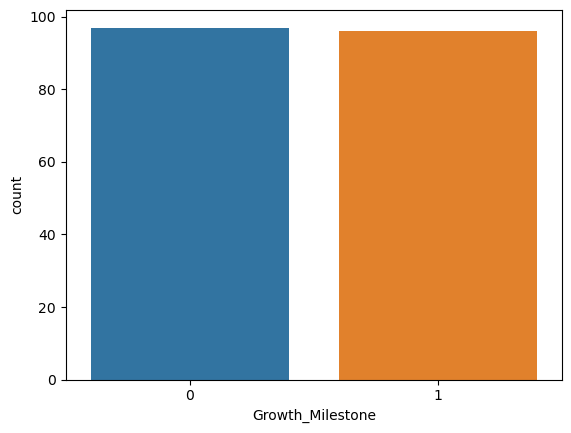

In [21]:
# countplot - Growth_Milestone

sns.countplot(x='Growth_Milestone', data=data)

In [24]:
#preprocessing

#import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Dividing Data into Training and Testing Sets 
X = data.drop('Growth_Milestone', axis=1)
y = data['Growth_Milestone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#Model Building and Evaluation
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)

print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.64


In [31]:
# Identifying Model Candidates
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [32]:
# Training and Evaluating Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    #Evaluation with Cross-Validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} CV Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Logistic Regression Accuracy: 0.49
Logistic Regression CV Accuracy: 0.58 ± 0.04
Random Forest Accuracy: 0.62
Random Forest CV Accuracy: 0.57 ± 0.08
Support Vector Machine Accuracy: 0.44
Support Vector Machine CV Accuracy: 0.59 ± 0.04
